In [2]:
import pandas as pd
import numpy as np

In [3]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 8CF0-23BD

 Directory of D:\master\data analize\7.ds

11/20/2020  02:31 PM    <DIR>          .
11/20/2020  02:31 PM    <DIR>          ..
11/13/2020  04:07 PM    <DIR>          .ipynb_checkpoints
11/03/2020  12:15 PM            30,643 electricity_use_per_person.csv
11/20/2020  02:31 PM           220,089 mini project.7.ipynb
11/03/2020  12:16 PM            18,472 oil_consumption_per_cap.csv
11/20/2020  02:30 PM           324,329 oil_vs_electricity.png
11/13/2020  03:59 PM            92,146 Untitled.ipynb
               5 File(s)        685,679 bytes
               3 Dir(s)  98,892,439,552 bytes free


In [4]:
oil=pd.read_csv('oil_consumption_per_cap.csv', index_col='country')
#oil['2014']
#oil['1990':'2014'] it is n't work well so we must convert our columns to int
oil.columns=[int(s) for s in oil.columns]
#oil.isna().sum(axis=0)
oil=oil[range(1971,2015)]
oil=oil.fillna(method='bfill',axis=1)
#display(oil)
#print(oil.index)
#print(oil.columns)
#oil[range(1990,2015)]

In [5]:
electricity=pd.read_csv('electricity_use_per_person.csv', index_col='country')
#electricity['2014']
#electricity['1990':'2014'] it is n't work well so we must convert our columns to int
electricity.columns=[int(s) for s in electricity.columns]
electricity=electricity[range(1971,2015)]
electricity=electricity.loc[oil.index,:]
#electricity.isna() replace true & false with nna
electricity=electricity.fillna(method='bfill',axis=1) #full nna with nextto blank
#electricity.isna().sum(axis=0)
#display(electricity)
#print(electricity.index)
#print(electricity.columns)
#electricity[range(1990,2015)]

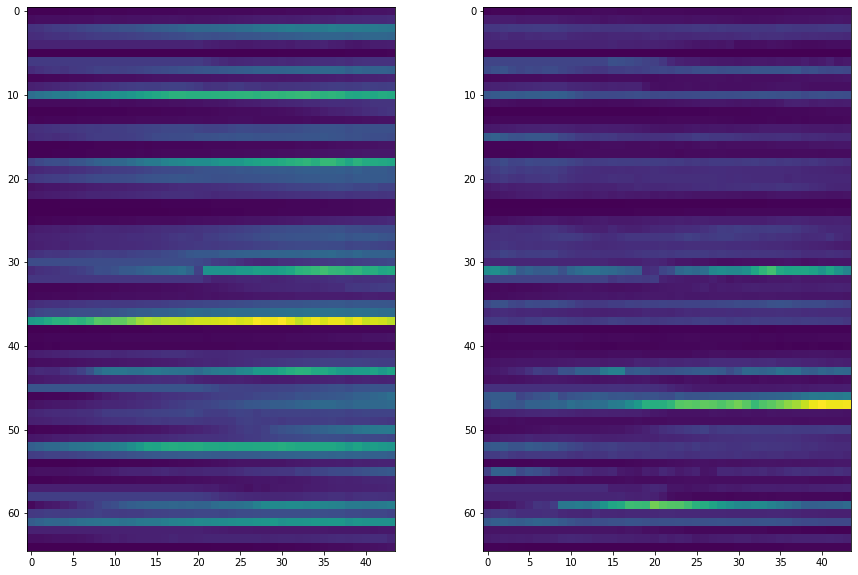

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(electricity)
plt.subplot(1,2,2)
plt.imshow(oil)

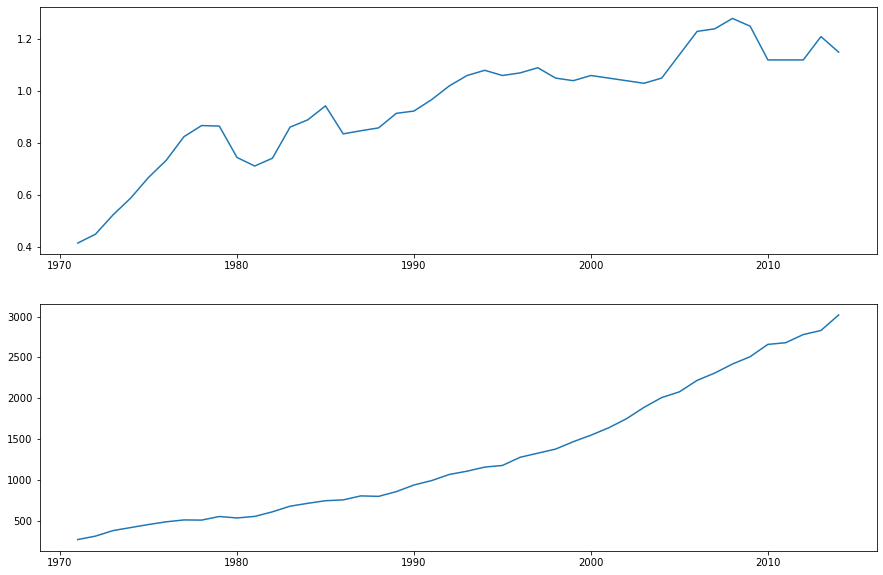

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(oil.loc['Iran',:])
plt.subplot(2,1,2)
plt.plot(electricity.loc['Iran',:])

In [8]:
#electricity.loc[:,1976].sort_values(ascending=False)
#electricity.sort_values(by=1976, ascending=False).head(10)

In [9]:
#electricity.mean(axis=1)
electricity['mean_usage']=electricity.mean(axis=1)
#electricity.sort_values(by='mean_usage')

In [10]:
#electricity=electricity.drop(['mean_user'],axis=1)
electricity=electricity.drop(['mean_usage'],axis=1)

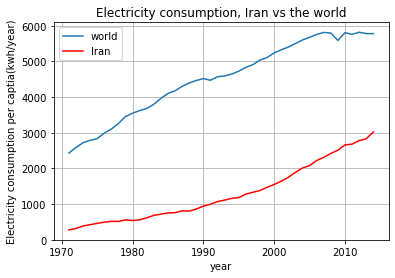

In [11]:
plt.plot(electricity.mean(axis=0))
plt.plot(electricity.loc['Iran',:],'r')
plt.legend(['world','Iran'])
plt.xlabel('year')
plt.ylabel('Electricity consumption per captia(kwh/year)')
plt.title('Electricity consumption, Iran vs the world')
plt.grid()

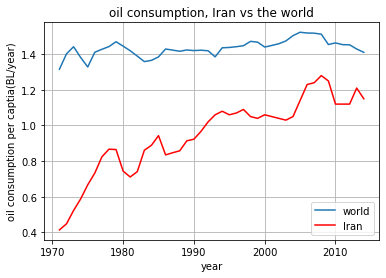

In [12]:
#oil consumption, Iran vs the world
plt.plot(oil.mean(axis=0))
plt.plot(oil.loc['Iran',:],'r')
plt.legend(['world','Iran'])
plt.xlabel('year')
plt.ylabel('oil consumption per captia(BL/year)')
plt.title('oil consumption, Iran vs the world')
plt.grid()

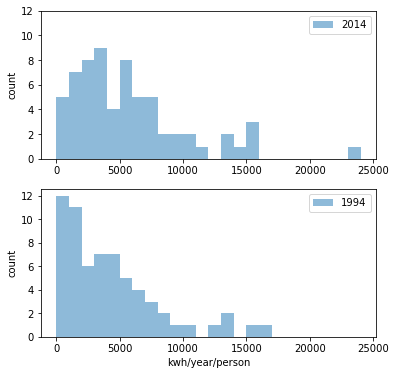

In [13]:
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.hist(electricity.loc[:,2014],bins=np.arange(0,25000,1000),alpha=0.5)
plt.ylabel('count')
plt.legend([2014])
plt.ylim(0,12)

plt.subplot(2,1,2)
plt.hist(electricity.loc[:,1994],bins=np.arange(0,25000,1000),alpha=0.5)
plt.xlabel('kwh/year/person')
plt.ylabel('count')
plt.legend([1994]);

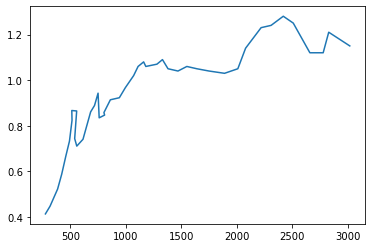

In [14]:
plt.plot(electricity.loc['Iran',:],oil.loc['Iran',:]);

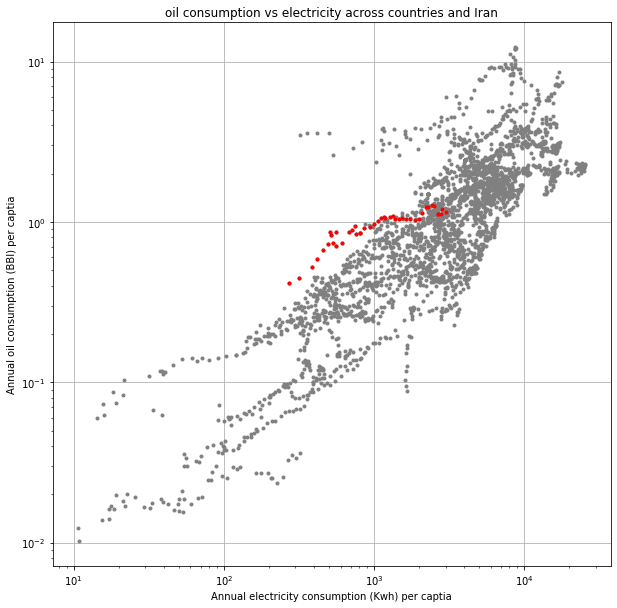

In [15]:
#oil consumption vs electricity across countries and Iran
plt.figure(figsize=(10,10))
for country in electricity.index:
    plt.plot(electricity.loc[country,:],oil.loc[country,:],'.',color='gray')
country='Iran'
plt.plot(electricity.loc['Iran',:],oil.loc['Iran',:],'.',color='red')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('Annual electricity consumption (Kwh) per captia')
plt.ylabel('Annual oil consumption (BBl) per captia')
plt.title('oil consumption vs electricity across countries and Iran')
plt.savefig('oil_vs_electricity.png',dpi=300)

In [16]:
#for country in electricity.index:
  # (electricity.loc[country,:],oil.loc[country,:])

In [1]:
#electricity